# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Loading the csv Dataset

In [3]:

# Load the dataset
data = pd.read_csv(r"C:\Users\SAI DINESH\Downloads\archive.zip")


# Data Cleaning
  Displaying the data by using Head

In [4]:
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

# Describing the Data For Analysis:

In [5]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())




Summary statistics of numerical columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Getting the Information of data:

In [6]:
# Information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(data.info())




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

#  Check for missing values

In [7]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())




Missing values in the dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Exploring and Visualizing the data:

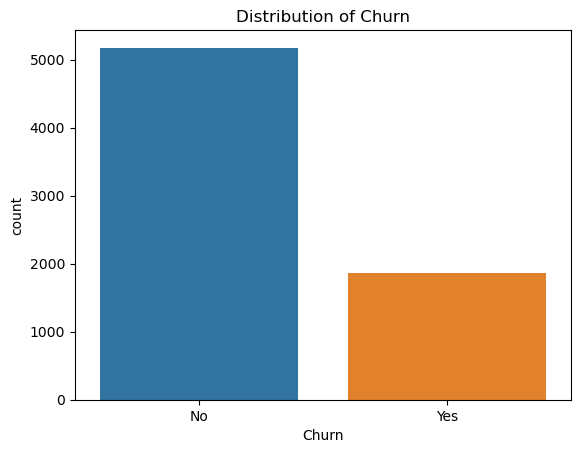

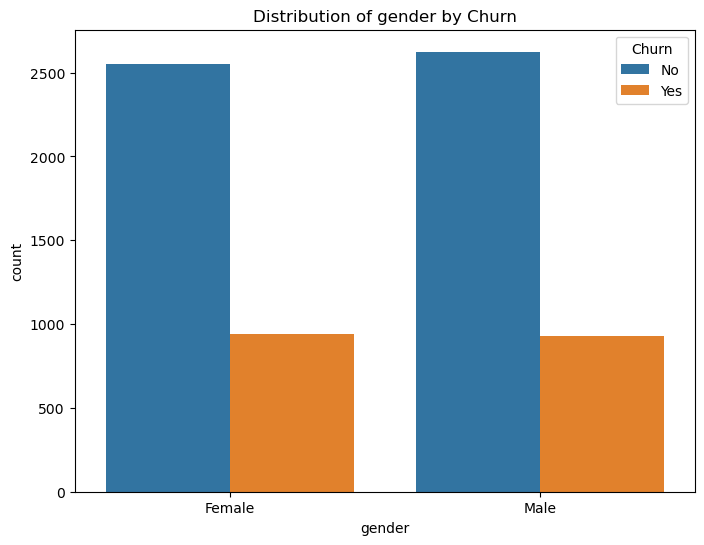

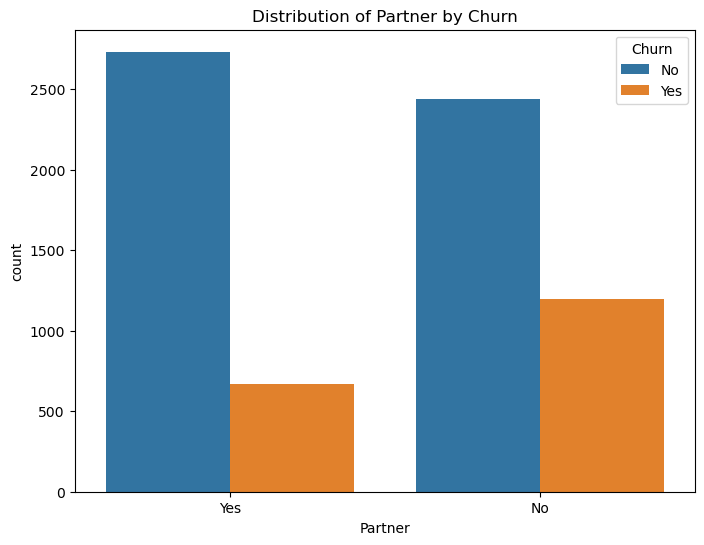

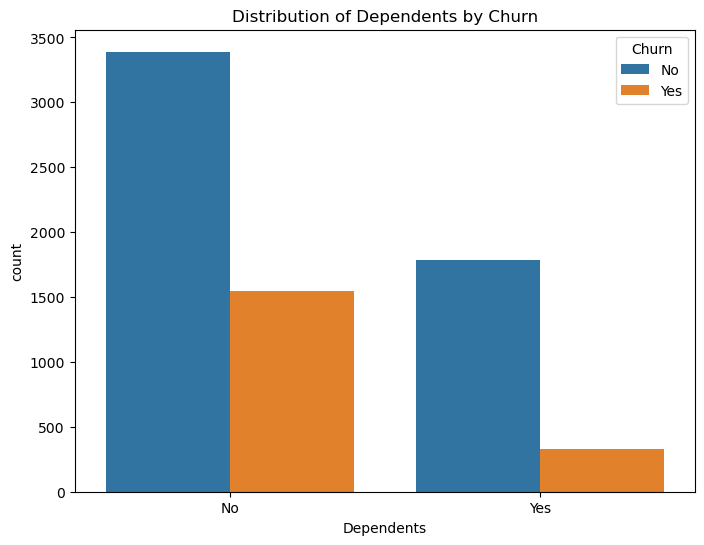

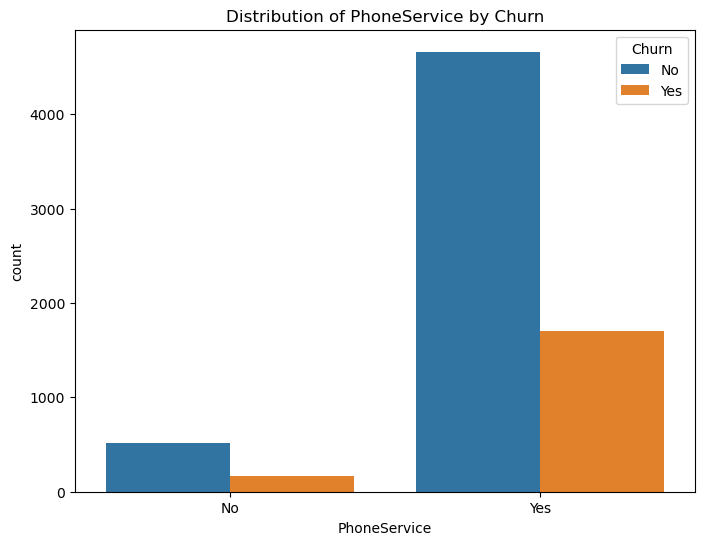

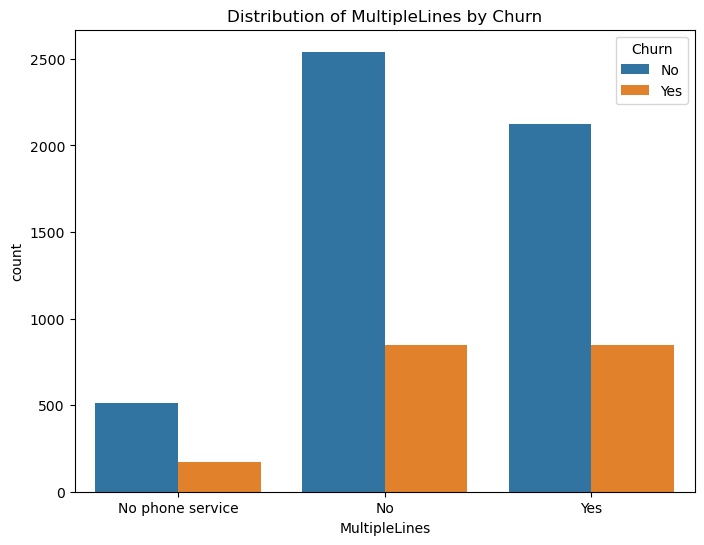

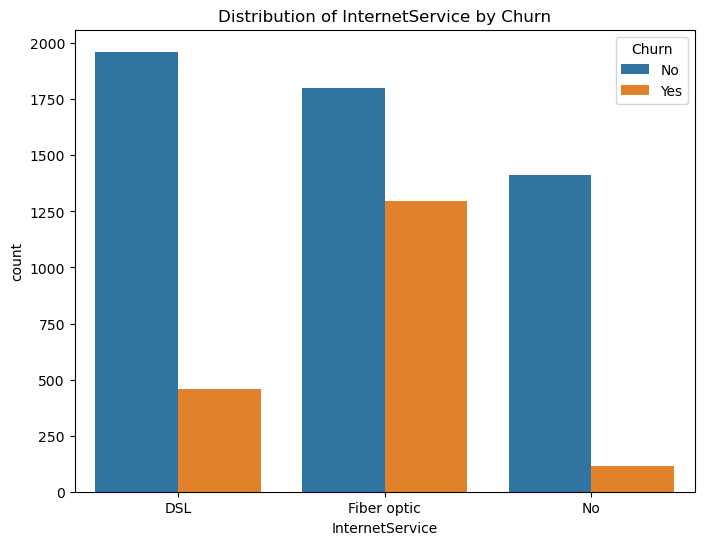

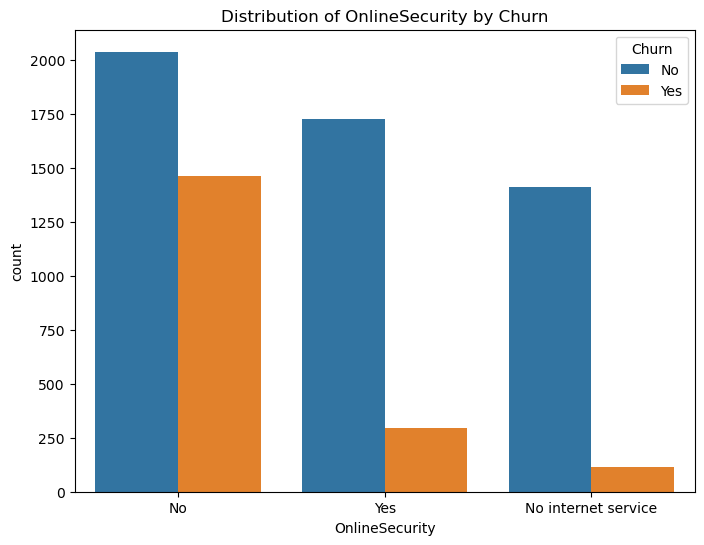

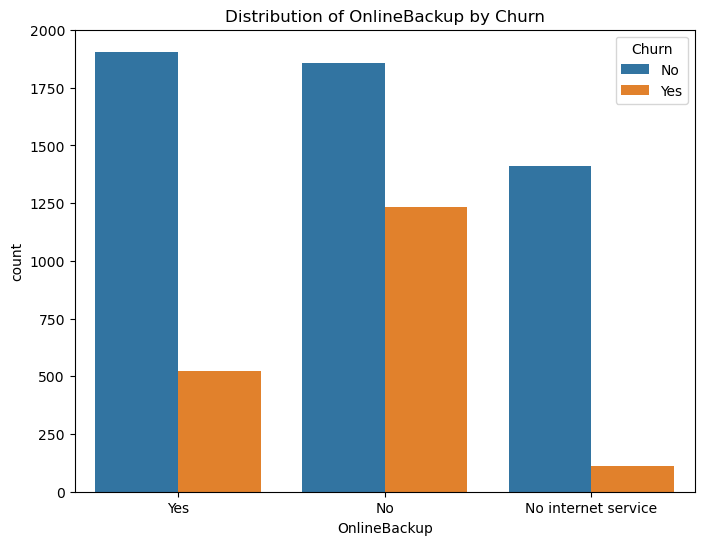

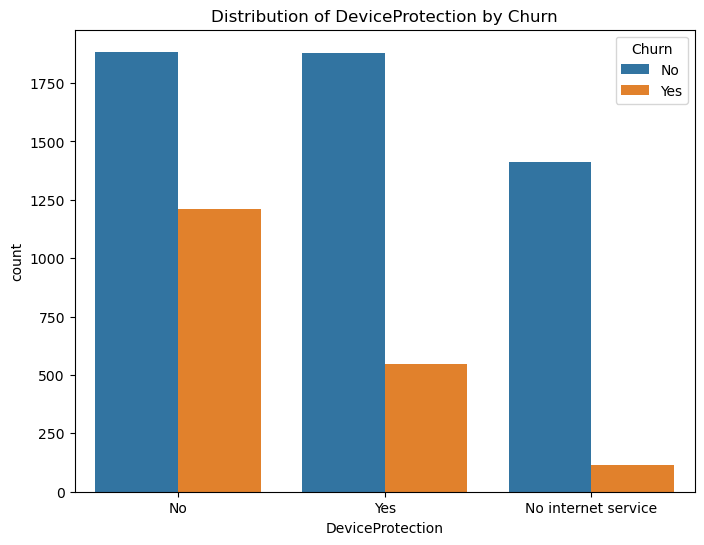

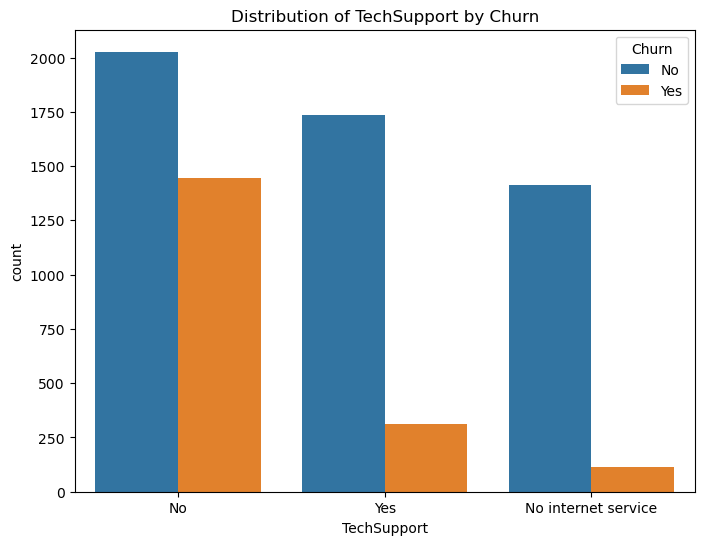

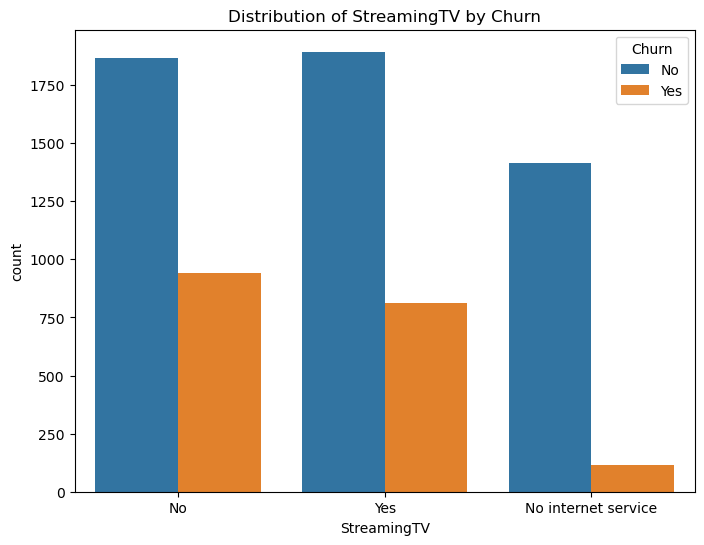

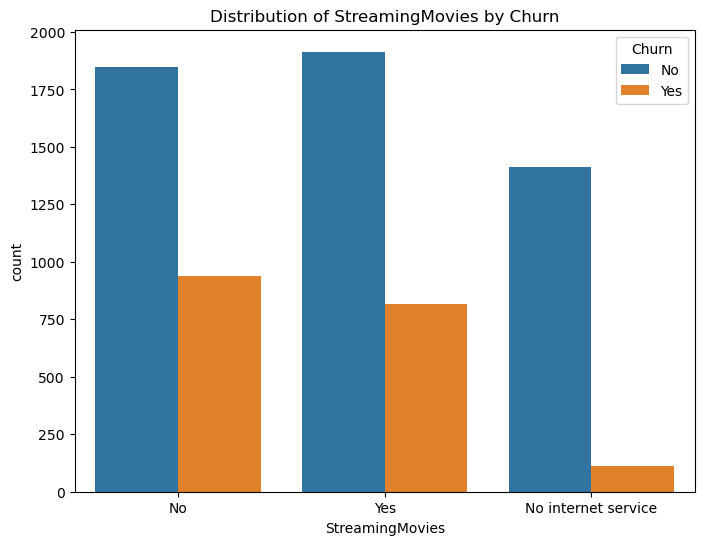

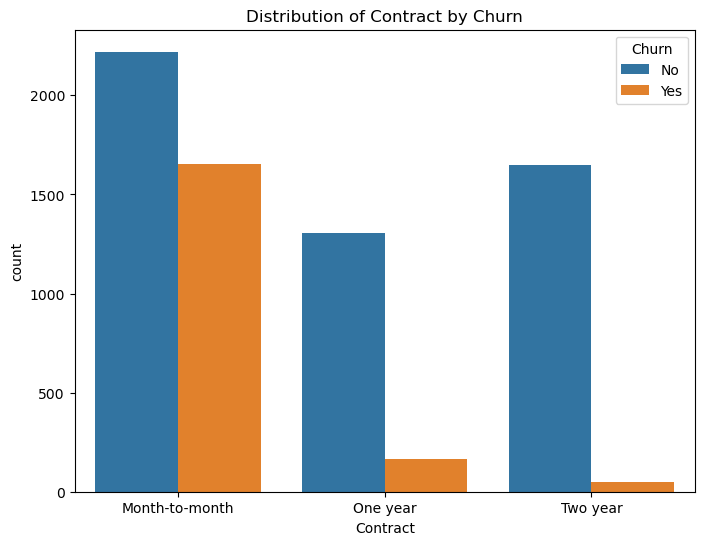

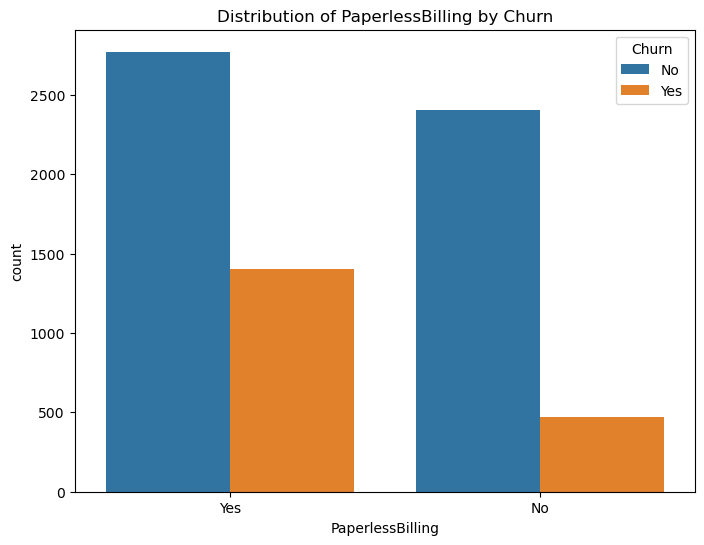

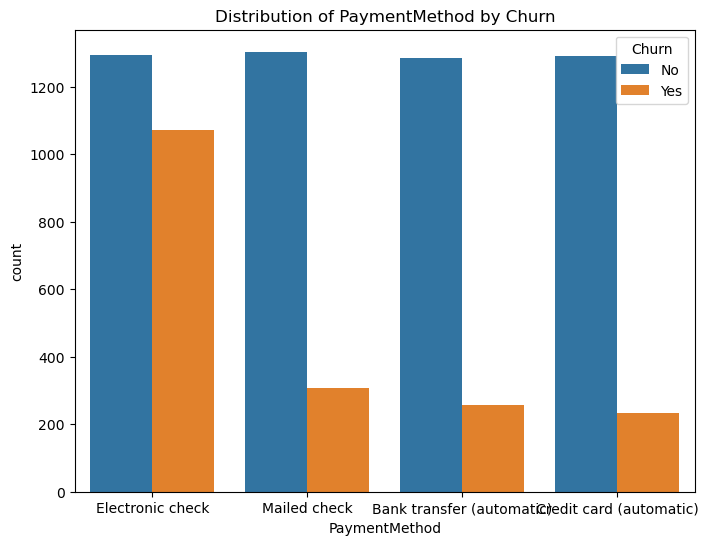

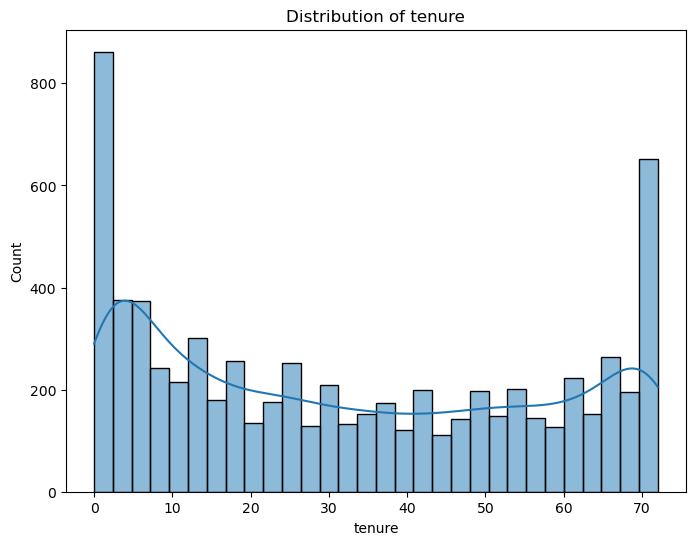

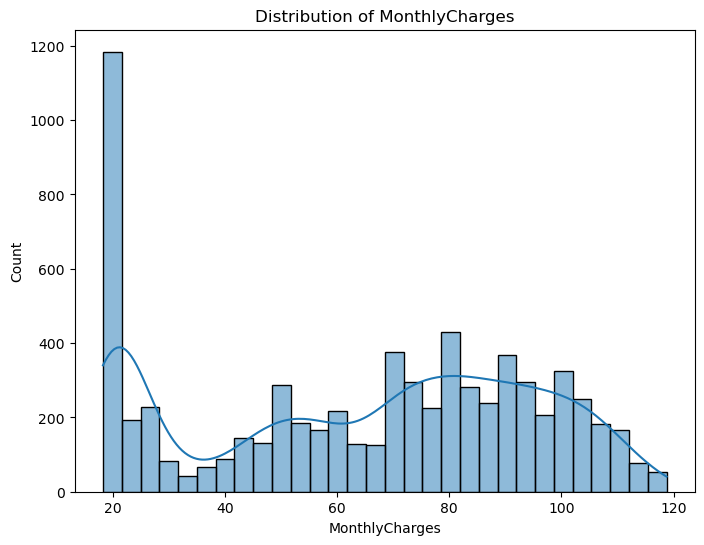

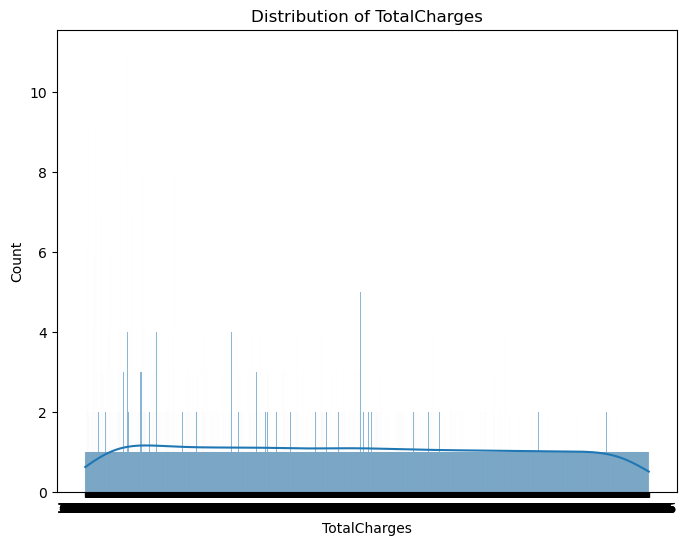

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Explore categorical variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

# Explore numerical variables
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Dropping the CustomerID column 

In [9]:

# Drop the 'customerID' column
data = data.drop('customerID', axis=1)



# Data Transformation

In [10]:
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])




# Handle missing values
# Assuming missing values are represented by empty strings (' ')

In [11]:
data.replace(' ', np.nan, inplace=True, regex=True)

# Replace missing values in 'TotalCharges' with the median
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
total_charges_median = data['TotalCharges'].median()
data['TotalCharges'].fillna(total_charges_median, inplace=True)


In [12]:
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Handle missing values
# Assuming missing values are represented by empty strings (' ')
data.replace(' ', pd.NA, inplace=True)

# Replace missing values in 'TotalCharges' with the median

In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
total_charges_median = data['TotalCharges'].median()
data['TotalCharges'].fillna(total_charges_median, inplace=True)



# Impute missing values for numerical features with the median

In [14]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])




#  Split the data into features (X) and target variable (y) and also Splitting into Training and Testing sets:

In [15]:
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection here the Random Forest Classifier is trained:

In [16]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluating the Model and here its is Achieving 79.56% Accuracy:

In [17]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 79.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409


Confusion Matrix:
 [[945  91]
 [197 176]]


# Fine Tuning the Model using randomized search and Gradient Boosting Classifier based on their HyperParameters:(Here it is Achieving 81.05%) 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter tuning using randomized search
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters from the randomized search
best_params = random_search.best_params_

# Use the best parameters to train the model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", f"{accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Accuracy: 81.05%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[942  94]
 [173 200]]


# Saving the Fine Tuned Model as a Joblib File:

In [19]:

from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# Assume 'model' is your fine-tuned RandomForestClassifier

# Save the model to a file
dump(model, 'fine_tuned_random_forest_model.joblib')

print("Fine-tuned model has been saved.")


Fine-tuned model has been saved.


#  Display the best parameters

In [20]:
print("Best Parameters:")
print(best_params)

Best Parameters:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [21]:
pip install jupyter_dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/7b/62/438626ab498869249e99376684ba6d88931e7c2dd86d03a92d9d7a9b4c54/dash-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for ansi2html from https://files.pythonhosted.org/packages/42/d7/1bc3433a2406b891182c25a7926abe3eb19af5870d540375ebf7795885b3/ansi2html-1.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB 682.7 kB/s eta 0:00:15
   ---------------------------------------- 0.1/10.2 MB 991.0 kB/s eta 0:00:11
   ---------------------------------------- 0.1/10.2 MB 871.5 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.2 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.2 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.2 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.2 MB 1.1 MB/s 

# Creating the Interactive Dashboard:

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from dash import dcc, html

# Assuming 'data' is your DataFrame
# Replace this with your actual DataFrame loading and preprocessing code

# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # Get the Flask server

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Churn Analysis Dashboard"),

    # Dropdown to select a feature for analysis
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns],
        value='MonthlyCharges',  # Default feature
        style={'width': '50%'}
    ),

    # Histogram to show the distribution of the selected feature
    dcc.Graph(id='feature-histogram'),

    # Summary statistics
    html.Div(id='summary-stats')
])

# Callback to update the histogram based on the selected feature
@app.callback(
    Output('feature-histogram', 'figure'),
    Output('summary-stats', 'children'),
    Input('feature-dropdown', 'value')
)
def update_histogram(selected_feature):
    # Create a histogram
    histogram_fig = px.histogram(data, x=selected_feature, title=f'Distribution of {selected_feature}')

    # Calculate summary statistics
    mean_value = data[selected_feature].mean()
    median_value = data[selected_feature].median()
    std_dev = data[selected_feature].std()

    # Format the summary statistics as text
    summary_text = f"Mean: {mean_value:.2f}<br>Median: {median_value:.2f}<br>Std Dev: {std_dev:.2f}"

    return histogram_fig, summary_text

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, mode="inline", port=8060)


C:\Users\SAI DINESH\AppData\Local\Temp\ipykernel_10928\2524819921.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\SAI DINESH\AppData\Local\Temp\ipykernel_10928\2524819921.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
